## Atharva Tiwari
## 21110038
#### Collaborators: Mihir Agarwal and Zaqi Momin

# DL Assignment -1

## Ans-2

The function $ f(x) $ is defined as:

$$
f(x) = \frac{{1 + \tanh\left(\frac{{wx + b}}{2}\right)}}{2}
$$

$ \tanh(z) $ is:

$$
\tanh(z) = \frac{{e^z - e^{-z}}}{{e^z + e^{-z}}}
$$

The loss function $ L((x,y)) $ is defined as:

$$
L((x,y)) = \frac{{(y - f(x))^2}}{2}
$$

The derivative of the loss function $ L $ with respect to $ w $ is:

$$
\frac{{dL}}{{dw}} = \frac{1}{2} \cdot 2 \cdot (-1) \cdot (y - f(x)) \cdot \frac{1}{2} \cdot (1 - \tanh^2\left(\frac{{wx + b}}{2}\right)) \cdot \frac{x}{2}
$$

$$
= \frac{1}{2} \cdot 2 \cdot (-1) \cdot \left(y - \frac{{1 + \tanh\left(\frac{{wx + b}}{2}\right)}}{2}\right) \cdot \frac{1}{2} \cdot \left(1 - \left(\tanh\left(\frac{{wx + b}}{2}\right)\right)^2\right) \cdot \frac{x}{2}
$$

The derivative of the loss function $ L $ with respect to $ b $ is:

$$
\frac{{dL}}{{db}} = \frac{1}{2} \cdot 2 \cdot (-1) \cdot (y - f(x)) \cdot \frac{1}{2} \cdot (1 - \tanh^2\left(\frac{{wx + b}}{2}\right)) \cdot \frac{1}{2}
$$

$$
= \frac{1}{2} \cdot 2 \cdot (-1) \cdot \left(y - \frac{{1 + \tanh\left(\frac{{wx + b}}{2}\right)}}{2}\right) \cdot \frac{1}{2} \cdot \left(1 - \left(\tanh\left(\frac{{wx + b}}{2}\right)\right)^2\right) \cdot \frac{1}{2}
$$

## Ans-3

Let $ A = \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix} $ be a square matrix.

Now, $ A^T $ is such that the sum of its every row is $ c $.

$ A^T = \begin{bmatrix} a_{11} & a_{21} & \dots & a_{n1} \\ a_{12} & a_{22} & \dots & a_{n2} \\ \vdots & \vdots & \ddots & \vdots \\ a_{1n} & a_{2n} & \dots & a_{nn} \end{bmatrix} $

Let $ x = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} $.

So, if we do $ A^T \cdot x $, the resultant vector would be:

$$ \begin{bmatrix} a_{11} + a_{21} + \dots + a_{n1} \\ a_{12} + a_{22} + \dots + a_{n2} \\ \vdots \\ a_{1n} + a_{2n} + \dots + a_{nn} \end{bmatrix} = \begin{bmatrix} c \\ c \\ \vdots \\ c \end{bmatrix} = c \cdot \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} = c \cdot x $$

Hence, $ c $ is an eigenvalue of $ A^T $.


# ANS-1

In [4]:
import numpy as np
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Download Fashion-MNIST dataset
train_set = FashionMNIST("./data", download=True, train=True, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionMNIST("./data", download=True, train=False, transform=transforms.Compose([transforms.ToTensor()]))

# Convert dataset to numpy arrays
X_train = train_set.data.numpy().reshape(-1, 28*28) / 255.0  # Normalize pixel values
y_train = train_set.targets.numpy()
X_test = test_set.data.numpy().reshape(-1, 28*28) / 255.0
y_test = test_set.targets.numpy()

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

100%|██████████| 26421880/26421880 [00:01<00:00, 18326731.47it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 348283.36it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6258501.97it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17413126.61it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [2]:
list_images =[] #list to store the images
a=np.zeros(10, dtype=int) # each element will be set 1 after ith class image is taken

for img,label in train_set:
  if a[label]==0:
    list_images.append((img,label)) # adding the tuple to the list_images
    a[label]+=1 # specifying that 1 image of this class has been stored

label_of_class = train_set.classes

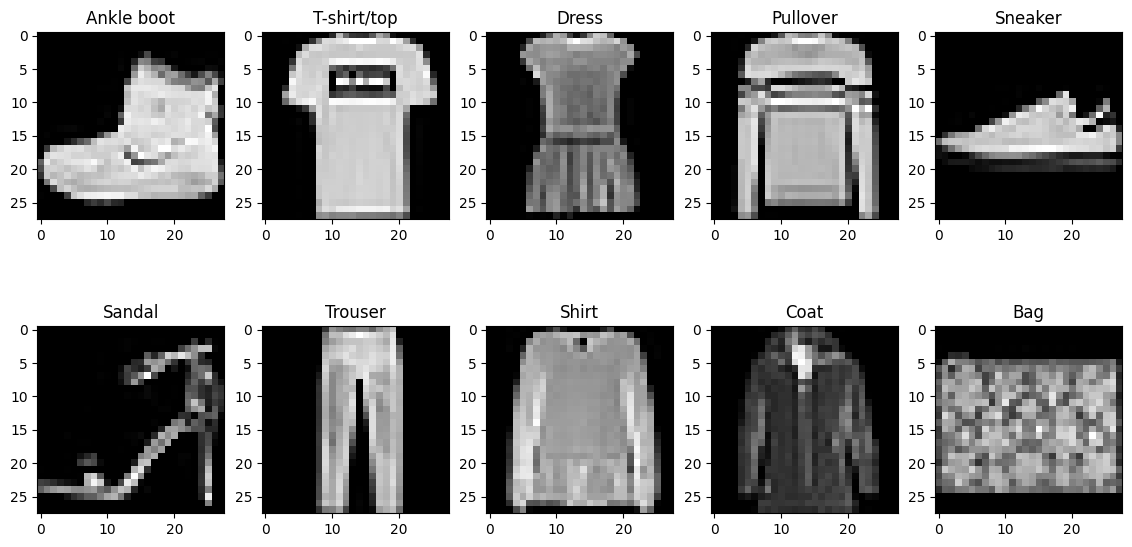

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(14, 7)) #setting the no of rows and columns in grid and size of figure
for i, (img, label) in enumerate(list_images): # iterating over the list_images
  ax = axes[i // 5, i % 5]  # calculating row no and column no for the subplot respectively
  ax.imshow(img.squeeze(), cmap='gray')
  ax.set_title(label_of_class[label]) #  name of class label for each  image

plt.show()

####Note at first I have  done analysis for 6 hyperparameters since it was taking a lot of time to do analysis for all the hyperparameters at once. Here to apply random/xavier you can comment out the respective lines.
#### In below code for each activation layer I have kept activation function as sigmoid. To keep some other activation function you can comment out appropriate lines.
####after running analysis for this I will write code for all hyperparameters altogether. But that code is taking a lot of time to run.

In [11]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_layers, hidden_size, output_size):
       # Initialize the neural network with input size, number of hidden layers, size of each hidden layer, and output size
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []

        # Initialize weights and biases for hidden layers
        prev_size = input_size
        for _ in range(hidden_layers):
            self.weights.append(np.random.randn(prev_size, hidden_size)) # random
            #self.weights.append(np.random.randn(prev_size, hidden_size) * np.sqrt(2 / (prev_size + hidden_size))) # xavier
            self.biases.append(np.zeros(hidden_size)) #initilize biases to zeros
            self.activations.append(np.zeros(hidden_size))
            prev_size = hidden_size

        # Initialize weights and biases for output layer
        self.weights.append(np.random.randn(hidden_size, output_size))
        #self.weights.append(np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))) #xavier
        self.biases.append(np.zeros(output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)


    # def relu(self, x):
    #     return np.maximum(0, x)

    # def tanh(self, x):
    #      return np.tanh(x)

    #define the forward_propogation algorithm
    def forward(self, X):
        output = X
        for i in range(self.hidden_layers):

            #compute output of the each activation layer
            output = self.sigmoid(np.dot(output, self.weights[i]) + self.biases[i]) #if activation function is sigmoid
            #output = self.relu(np.dot(output, self.weights[i]) + self.biases[i]) # if activation function is relu
            #output = self.tanh(np.dot(output, self.weights[i]) + self.biases[i]) # if activation function is tanh
            self.activations[i] = output

        # output of last layer
        output = self.softmax(np.dot(output, self.weights[-1]) + self.biases[-1])
        return output

    # define backward propogation algorithm
    def backward(self, X, y):
        batch_size = X.shape[0]
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        # Forward_propgate
        output = self.forward(X)

        # compute gradients
        error = output - np.eye(self.output_size)[y] #error by taking the difference between predicted output and one-hot encoded actual labels
        gradients_w[-1] = np.dot(self.activations[-1].T, error) # gradient for weights of output layer
        gradients_b[-1] = np.sum(error, axis=0) #bias for weights of

        for i in range(self.hidden_layers-1, -1, -1):

            # for fully connected layer: dE/dX=dE/dY * W^T
            # for activation layer: dE/dX= dE/dY * activation'(x) where dE/dY is dE/dY of fully connected layer
            # Hence, finally for total layer we can write dE/dX= dE/dY * W^T * activation'(x)

            error = np.dot(error, self.weights[i+1].T) * self.activations[i] * (1 - self.activations[i]) #if activation function is sigmoid
            #error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0). # if activation function is relu
            #error = np.dot(error, self.weights[i+1].T) * (1 - self.activations[i] ** 2) # if activation function is tanh
            gradients_w[i] = np.dot(self.activations[i-1].T, error) if i > 0 else np.dot(X.T, error) #  dE/dW
            gradients_b[i] = np.sum(error, axis=0) # dE/dB

        return gradients_w, gradients_b

    def train(self, X, y, epochs, learning_rate, optimizer=None, verbose=True):
        for epoch in range(epochs):
            gradients_w, gradients_b = self.backward(X, y) # computing gradients through backward propogation
            if optimizer is not None:
                optimizer.update_params(self, gradients_w, gradients_b, learning_rate)
            else:
                for i in range(len(self.weights)):
                    self.weights[i] -= learning_rate * gradients_w[i] / len(X)
                    self.biases[i] -= learning_rate * gradients_b[i] / len(X)
            if verbose:
                #CROSS ENTROPY LOSS
                loss = -np.mean(np.log(self.forward(X)[np.arange(len(y)), y]))
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [15]:
class Optimizer:
    def __init__(self, method='sgd', beta=0.9):
        self.method = method
        self.beta = beta
        self.v_w = None
        self.v_b = None

    def update_params(self, nn, gradients_w, gradients_b, learning_rate):
        if self.method == 'sgd':
            for i in range(len(nn.weights)):
                nn.weights[i] -= learning_rate * gradients_w[i]
                nn.biases[i] -= learning_rate * gradients_b[i]
        elif self.method == 'momentum':
            if self.v_w is None:
                self.v_w = [np.zeros_like(w) for w in nn.weights]
                self.v_b = [np.zeros_like(b) for b in nn.biases]
            for i in range(len(nn.weights)):
                self.v_w[i] = self.beta * self.v_w[i] + learning_rate * gradients_w[i]
                self.v_b[i] = self.beta * self.v_b[i] + learning_rate * gradients_b[i]
                nn.weights[i] -= self.v_w[i]
                nn.biases[i] -= self.v_b[i]
        elif self.method == 'nesterov':
            if self.v_w is None:
                self.v_w = [np.zeros_like(w) for w in nn.weights]
                self.v_b = [np.zeros_like(b) for b in nn.biases]
            for i in range(len(nn.weights)):
                v_w_prev = self.v_w[i]
                v_b_prev = self.v_b[i]
                self.v_w[i] = self.beta * self.v_w[i] - learning_rate * gradients_w[i]
                self.v_b[i] = self.beta * self.v_b[i] - learning_rate * gradients_b[i]
                nn.weights[i] += -self.beta * v_w_prev + (1 + self.beta) * self.v_w[i]
                nn.biases[i] += -self.beta * v_b_prev + (1 + self.beta) * self.v_b[i]
        else:
            raise ValueError("Wrong/incorrect/invalid optimization method.")

Top 1 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Optimizer: momentum, Batch Size: 32
Validation Accuracy: 0.7982

Top 2 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Optimizer: nesterov, Batch Size: 16
Validation Accuracy: 0.7973

Top 3 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Optimizer: nesterov, Batch Size: 64
Validation Accuracy: 0.8082

Top 4 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.001, Optimizer: nesterov, Batch Size: 64
Validation Accuracy: 0.8057

Top 5 Configuration:
Epochs: 5, Hidden Layers: 5, Hidden Size: 32, Learning Rate: 0.001, Optimizer: momentum, Batch Size: 64
Validation Accuracy: 0.8025

Test Accuracy of the Best Model: 0.7862


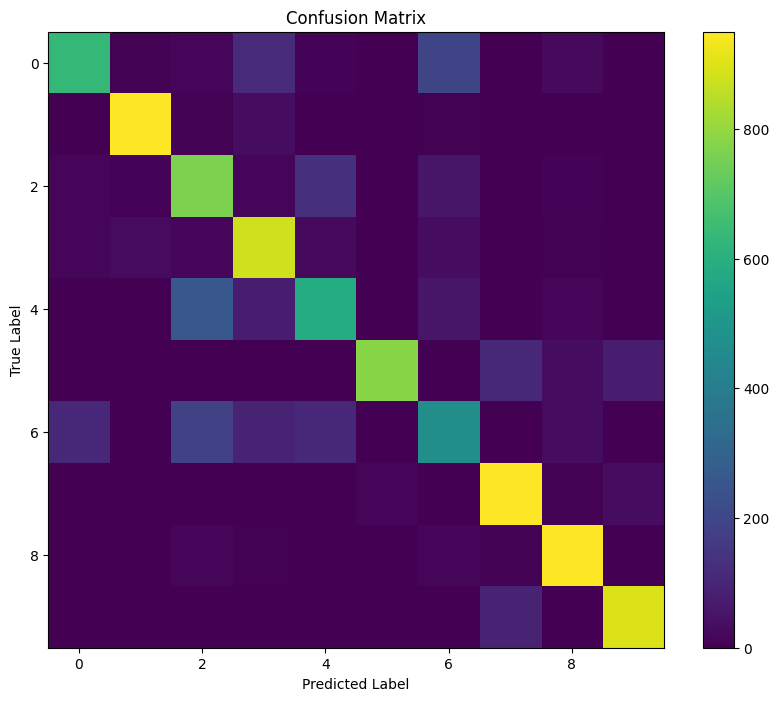

In [6]:
# Define hyperparameters to search
epochs_values = [5]
hidden_layers_values = [3, 5]
hidden_size_values = [32, 64, 128]
learning_rate_values = [1e-3, 1e-4]
optimizer_values = ['sgd', 'momentum', 'nesterov']
batch_size_values = [16, 32, 64]

best_models = []
best_accuracies = []

# Perform hyperparameter search
for epochs in epochs_values:
    for hidden_layers in hidden_layers_values:
        for hidden_size in hidden_size_values:
            for learning_rate in learning_rate_values:
                for optimizer_name in optimizer_values:
                    for batch_size in batch_size_values:
                        # Initialize and train the model
                        nn = NeuralNetwork(input_size=784, hidden_layers=hidden_layers,
                                           hidden_size=hidden_size, output_size=10) # for mnist: input_size=28*28=784 and output_size=10
                        optimizer = Optimizer(method=optimizer_name)  # define which optimization we want
                        for i in range(0, len(X_train), batch_size):
                            X_batch = X_train[i:i+batch_size]
                            y_batch = y_train[i:i+batch_size]
                            nn.train(X_batch, y_batch, epochs=epochs, learning_rate=learning_rate, optimizer=optimizer, verbose=False) # since we have kep verbose=false no loss is being printed

                        # Evaluate on validation set
                        y_pred = nn.predict(X_val)
                        accuracy = accuracy_score(y_val, y_pred)

                        # Save the model if it achieves top accuracy
                        if len(best_accuracies) < 5 or accuracy > min(best_accuracies): #check if either the list of best accuracies has fewer than 5 elements or if the accuracy of the current model  is greater than the minimum accuracy in the list.
                        #if the above condition is true, the current model along with its parameters and its accuracy is added to the list of best models and best_accuracies
                            best_models.append((nn, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size))
                            best_accuracies.append(accuracy)
                            if len(best_accuracies) > 5:
                                min_index = np.argmin(best_accuracies)
                                del best_models[min_index]
                                del best_accuracies[min_index]

# Report top 5 configurations
for i, (model, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size) in enumerate(best_models):
    print(f"Top {i+1} Configuration:")
    print(f"Epochs: {epochs}, Hidden Layers: {hidden_layers}, Hidden Size: {hidden_size}, "
          f"Learning Rate: {learning_rate}, Optimizer: {optimizer_name}, Batch Size: {batch_size}")
    print(f"Validation Accuracy: {best_accuracies[i]:.4f}")
    print()

# Evaluate the best model on the test set
best_model = best_models[0][0]
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='viridis')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####now lets try with relu activation function

In [2]:
class NeuralNetwork_r:
    def __init__(self, input_size, hidden_layers, hidden_size, output_size):
       # Initialize the neural network with input size, number of hidden layers, size of each hidden layer, and output size
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []

        # Initialize weights and biases for hidden layers
        prev_size = input_size
        for _ in range(hidden_layers):
            self.weights.append(np.random.randn(prev_size, hidden_size)) # random
            #self.weights.append(np.random.randn(prev_size, hidden_size) * np.sqrt(2 / (prev_size + hidden_size))) # xavier
            self.biases.append(np.zeros(hidden_size)) #initilize biases to zeros
            self.activations.append(np.zeros(hidden_size))
            prev_size = hidden_size

        # Initialize weights and biases for output layer
        self.weights.append(np.random.randn(hidden_size, output_size))
        #self.weights.append(np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))) #xavier
        self.biases.append(np.zeros(output_size))

    # def sigmoid(self, x):
    #     return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)


    def relu(self, x):
        return np.maximum(0, x)

    # def tanh(self, x):
    #      return np.tanh(x)

    #define the forward_propogation algorithm
    def forward(self, X):
        output = X
        for i in range(self.hidden_layers):

            #compute output of the each activation layer
            # output = self.sigmoid(np.dot(output, self.weights[i]) + self.biases[i]) #if activation function is sigmoid
            output = self.relu(np.dot(output, self.weights[i]) + self.biases[i]) # if activation function is relu
            #output = self.tanh(np.dot(output, self.weights[i]) + self.biases[i]) # if activation function is tanh
            self.activations[i] = output

        # output of last layer
        output = self.softmax(np.dot(output, self.weights[-1]) + self.biases[-1])
        return output

    # define backward propogation algorithm
    def backward(self, X, y):
        batch_size = X.shape[0]
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        # Forward_propgate
        output = self.forward(X)

        # compute gradients
        error = output - np.eye(self.output_size)[y] #error by taking the difference between predicted output and one-hot encoded actual labels
        gradients_w[-1] = np.dot(self.activations[-1].T, error) # gradient for weights of output layer
        gradients_b[-1] = np.sum(error, axis=0) #bias for weights of

        for i in range(self.hidden_layers-1, -1, -1):
            # error = np.dot(error, self.weights[i+1].T) * self.activations[i] * (1 - self.activations[i]) #if activation function is sigmoid
            error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0) # if activation function is relu
            #error = np.dot(error, self.weights[i+1].T) * (1 - self.activations[i] ** 2) # if activation function is tanh
            gradients_w[i] = np.dot(self.activations[i-1].T, error) if i > 0 else np.dot(X.T, error)
            gradients_b[i] = np.sum(error, axis=0)

        return gradients_w, gradients_b

    def train(self, X, y, epochs, learning_rate, optimizer=None, verbose=True):
        for epoch in range(epochs):
            gradients_w, gradients_b = self.backward(X, y)
            if optimizer is not None:
                optimizer.update_params(self, gradients_w, gradients_b, learning_rate)
            else:
                for i in range(len(self.weights)):
                    self.weights[i] -= learning_rate * gradients_w[i] / len(X)
                    self.biases[i] -= learning_rate * gradients_b[i] / len(X)
            if verbose:
              #CROSS ENTROPY LOSS
                loss = -np.mean(np.log(self.forward(X)[np.arange(len(y)), y]))
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

<ipython-input-2-e3ab59397a03>:71: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0) # if activation function is relu
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:30: RuntimeWarn

Top 1 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 64
Validation Accuracy: 0.3277

Top 2 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.0001, Optimizer: nesterov, Batch Size: 32
Validation Accuracy: 0.5407

Top 3 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 32
Validation Accuracy: 0.3443

Top 4 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.0001, Optimizer: momentum, Batch Size: 16
Validation Accuracy: 0.3215

Top 5 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 32
Validation Accuracy: 0.3287

Test Accuracy of the Best Model: 0.3219


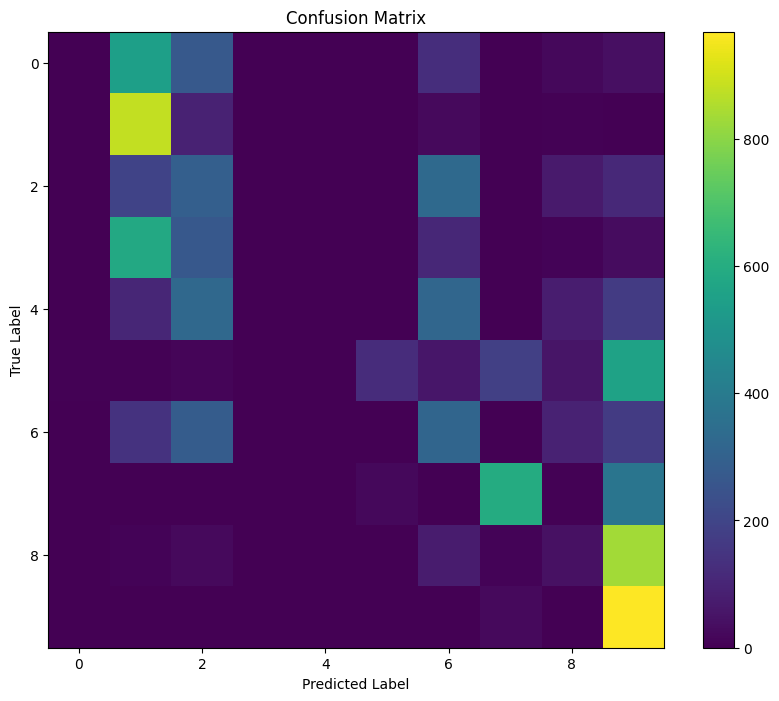

In [7]:
# Define hyperparameters to search
epochs_values = [5]
hidden_layers_values = [3, 5]
hidden_size_values = [32, 64, 128]
learning_rate_values = [1e-3, 1e-4]
optimizer_values = ['sgd', 'momentum', 'nesterov']
batch_size_values = [16, 32, 64]

best_models = []
best_accuracies = []

# Perform hyperparameter search
for epochs in epochs_values:
    for hidden_layers in hidden_layers_values:
        for hidden_size in hidden_size_values:
            for learning_rate in learning_rate_values:
                for optimizer_name in optimizer_values:
                    for batch_size in batch_size_values:
                        # Initialize and train the model
                        nn = NeuralNetwork_r(input_size=784, hidden_layers=hidden_layers,
                                           hidden_size=hidden_size, output_size=10) # for mnist input_size=28*28=784 and output_size=10
                        optimizer = Optimizer(method=optimizer_name)
                        for i in range(0, len(X_train), batch_size):
                            X_batch = X_train[i:i+batch_size]
                            y_batch = y_train[i:i+batch_size]
                            nn.train(X_batch, y_batch, epochs=epochs, learning_rate=learning_rate, optimizer=optimizer, verbose=False)

                        # Evaluate on validation set
                        y_pred = nn.predict(X_val)
                        accuracy = accuracy_score(y_val, y_pred)

                        # Save the model if it achieves top accuracy
                        if len(best_accuracies) < 5 or accuracy > min(best_accuracies):
                            best_models.append((nn, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size))
                            best_accuracies.append(accuracy)
                            if len(best_accuracies) > 5:
                                min_index = np.argmin(best_accuracies)
                                del best_models[min_index]
                                del best_accuracies[min_index]

# Report top 5 configurations
for i, (model, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size) in enumerate(best_models):
    print(f"Top {i+1} Configuration:")
    print(f"Epochs: {epochs}, Hidden Layers: {hidden_layers}, Hidden Size: {hidden_size}, "
          f"Learning Rate: {learning_rate}, Optimizer: {optimizer_name}, Batch Size: {batch_size}")
    print(f"Validation Accuracy: {best_accuracies[i]:.4f}")
    print()

# Evaluate the best model on the test set
best_model = best_models[0][0]
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='viridis')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####now lets try with tanh as activation function

In [8]:
class NeuralNetwork_t:
    def __init__(self, input_size, hidden_layers, hidden_size, output_size):
       # Initialize the neural network with input size, number of hidden layers, size of each hidden layer, and output size
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []

        # Initialize weights and biases for hidden layers
        prev_size = input_size
        for _ in range(hidden_layers):
            self.weights.append(np.random.randn(prev_size, hidden_size)) # random
            #self.weights.append(np.random.randn(prev_size, hidden_size) * np.sqrt(2 / (prev_size + hidden_size))) # xavier
            self.biases.append(np.zeros(hidden_size)) #initilize biases to zeros
            self.activations.append(np.zeros(hidden_size))
            prev_size = hidden_size

        # Initialize weights and biases for output layer
        self.weights.append(np.random.randn(hidden_size, output_size))
        #self.weights.append(np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size))) #xavier
        self.biases.append(np.zeros(output_size))

    # def sigmoid(self, x):
    #     return 1 / (1 + np.exp(-x))

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)


    # def relu(self, x):
    #     return np.maximum(0, x)

    def tanh(self, x):
         return np.tanh(x)

    #define the forward_propogation algorithm
    def forward(self, X):
        output = X
        for i in range(self.hidden_layers):

            #compute output of the each activation layer
            # output = self.sigmoid(np.dot(output, self.weights[i]) + self.biases[i]) #if activation function is sigmoid
            #output = self.relu(np.dot(output, self.weights[i]) + self.biases[i]) # if activation function is relu
            output = self.tanh(np.dot(output, self.weights[i]) + self.biases[i]) # if activation function is tanh
            self.activations[i] = output

        # output of last layer
        output = self.softmax(np.dot(output, self.weights[-1]) + self.biases[-1])
        return output

    # define backward propogation algorithm
    def backward(self, X, y):
        batch_size = X.shape[0]
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        # Forward_propgate
        output = self.forward(X)

        # compute gradients
        error = output - np.eye(self.output_size)[y] #error by taking the difference between predicted output and one-hot encoded actual labels
        gradients_w[-1] = np.dot(self.activations[-1].T, error) # gradient for weights of output layer
        gradients_b[-1] = np.sum(error, axis=0) #bias for weights of

        for i in range(self.hidden_layers-1, -1, -1):

            # for fully connected layer: dE/dX=dE/dY * W^T
            # for activation layer: dE/dX= dE/dY * activation'(x) where dE/dY is dE/dY of fully connected layer
            # Hence, finally for total layer we can write dE/dX= dE/dY * W^T * activation'(x)

            # error = np.dot(error, self.weights[i+1].T) * self.activations[i] * (1 - self.activations[i]) #if activation function is sigmoid
            #error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0). # if activation function is relu
            error = np.dot(error, self.weights[i+1].T) * (1 - self.activations[i] ** 2) # if activation function is tanh
            gradients_w[i] = np.dot(self.activations[i-1].T, error) if i > 0 else np.dot(X.T, error) #  dE/dW
            gradients_b[i] = np.sum(error, axis=0) # dE/dB

        return gradients_w, gradients_b

    def train(self, X, y, epochs, learning_rate, optimizer=None, verbose=True):
        for epoch in range(epochs):
            gradients_w, gradients_b = self.backward(X, y) # computing gradients through backward propogation
            if optimizer is not None:
                optimizer.update_params(self, gradients_w, gradients_b, learning_rate)
            else:
                for i in range(len(self.weights)):
                    self.weights[i] -= learning_rate * gradients_w[i] / len(X)
                    self.biases[i] -= learning_rate * gradients_b[i] / len(X)
            if verbose:
              #CROSS ENTROPY LOSS
                loss = -np.mean(np.log(self.forward(X)[np.arange(len(y)), y]))
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

<ipython-input-2-e3ab59397a03>:71: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0) # if activation function is relu
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:71: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0) # if activation function is relu
<ipython-input-2-e3ab59397a03>:71: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * np.where(self.activations[i] > 0, 1, 0) # if activation function is relu
<ipython-input-2-e3ab59397a03>:30: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-2-e3ab59397a03>:71: RuntimeWarning: invalid value encountere

Top 1 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 16
Validation Accuracy: 0.3925

Top 2 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 32
Validation Accuracy: 0.5053

Top 3 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.0001, Optimizer: momentum, Batch Size: 16
Validation Accuracy: 0.2927

Top 4 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 16
Validation Accuracy: 0.3687

Top 5 Configuration:
Epochs: 5, Hidden Layers: 3, Hidden Size: 64, Learning Rate: 0.0001, Optimizer: sgd, Batch Size: 32
Validation Accuracy: 0.3497

Test Accuracy of the Best Model: 0.3857


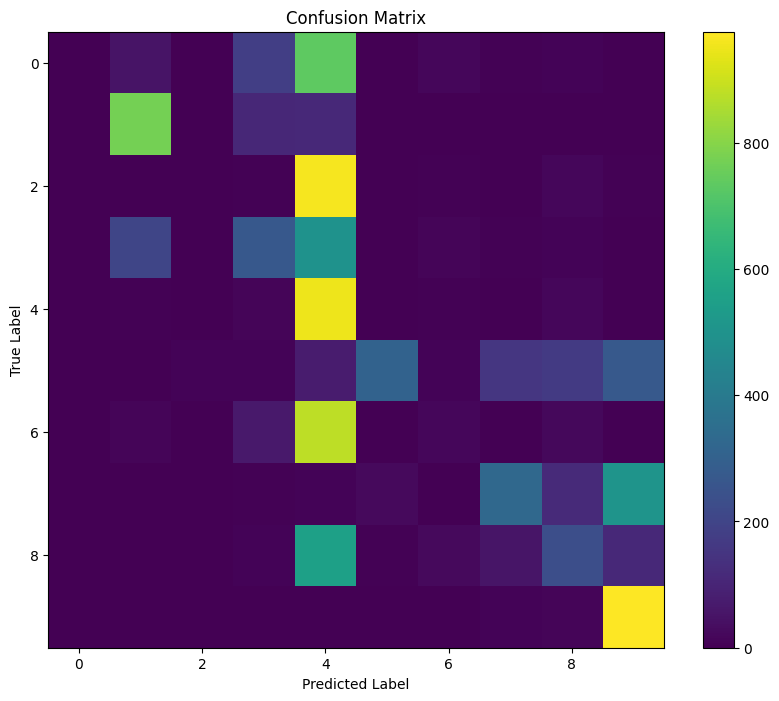

In [10]:
# Define hyperparameters to search
epochs_values = [5]
hidden_layers_values = [3, 5]
hidden_size_values = [32, 64, 128]
learning_rate_values = [1e-3, 1e-4]
optimizer_values = ['sgd', 'momentum', 'nesterov']
batch_size_values = [16, 32, 64]

best_models = []
best_accuracies = []

# Perform hyperparameter search
for epochs in epochs_values:
    for hidden_layers in hidden_layers_values:
        for hidden_size in hidden_size_values:
            for learning_rate in learning_rate_values:
                for optimizer_name in optimizer_values:  # Rename the variable to avoid conflicts
                    for batch_size in batch_size_values:
                        # Initialize and train the model
                        nn = NeuralNetwork_r(input_size=784, hidden_layers=hidden_layers,
                                           hidden_size=hidden_size, output_size=10) # for mnist input_size=28*28=784 and output_size=10
                        optimizer = Optimizer(method=optimizer_name)  # Pass optimizer method here
                        for i in range(0, len(X_train), batch_size):
                            X_batch = X_train[i:i+batch_size]
                            y_batch = y_train[i:i+batch_size]
                            nn.train(X_batch, y_batch, epochs=epochs, learning_rate=learning_rate, optimizer=optimizer, verbose=False)

                        # Evaluate on validation set
                        y_pred = nn.predict(X_val)
                        accuracy = accuracy_score(y_val, y_pred)

                        # Save the model if it achieves top accuracy
                        if len(best_accuracies) < 5 or accuracy > min(best_accuracies):
                            best_models.append((nn, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size))
                            best_accuracies.append(accuracy)
                            if len(best_accuracies) > 5:
                                min_index = np.argmin(best_accuracies)
                                del best_models[min_index]
                                del best_accuracies[min_index]

# Report top 5 configurations
for i, (model, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size) in enumerate(best_models):
    print(f"Top {i+1} Configuration:")
    print(f"Epochs: {epochs}, Hidden Layers: {hidden_layers}, Hidden Size: {hidden_size}, "
          f"Learning Rate: {learning_rate}, Optimizer: {optimizer_name}, Batch Size: {batch_size}")
    print(f"Validation Accuracy: {best_accuracies[i]:.4f}")
    print()

# Evaluate the best model on the test set
best_model = best_models[0][0]
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='viridis')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####now since we have seen that accuracy is coming more with sigmoid, lets try sigmoid with epoch=10

Top 1 Configuration:
Epochs: 10, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Optimizer: momentum, Batch Size: 64
Validation Accuracy: 0.8087

Top 2 Configuration:
Epochs: 10, Hidden Layers: 3, Hidden Size: 32, Learning Rate: 0.001, Optimizer: nesterov, Batch Size: 64
Validation Accuracy: 0.8055

Top 3 Configuration:
Epochs: 10, Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.001, Optimizer: momentum, Batch Size: 16
Validation Accuracy: 0.7890

Top 4 Configuration:
Epochs: 10, Hidden Layers: 3, Hidden Size: 128, Learning Rate: 0.0001, Optimizer: momentum, Batch Size: 64
Validation Accuracy: 0.7930

Top 5 Configuration:
Epochs: 10, Hidden Layers: 5, Hidden Size: 32, Learning Rate: 0.001, Optimizer: nesterov, Batch Size: 64
Validation Accuracy: 0.7970

Test Accuracy of the Best Model: 0.8040


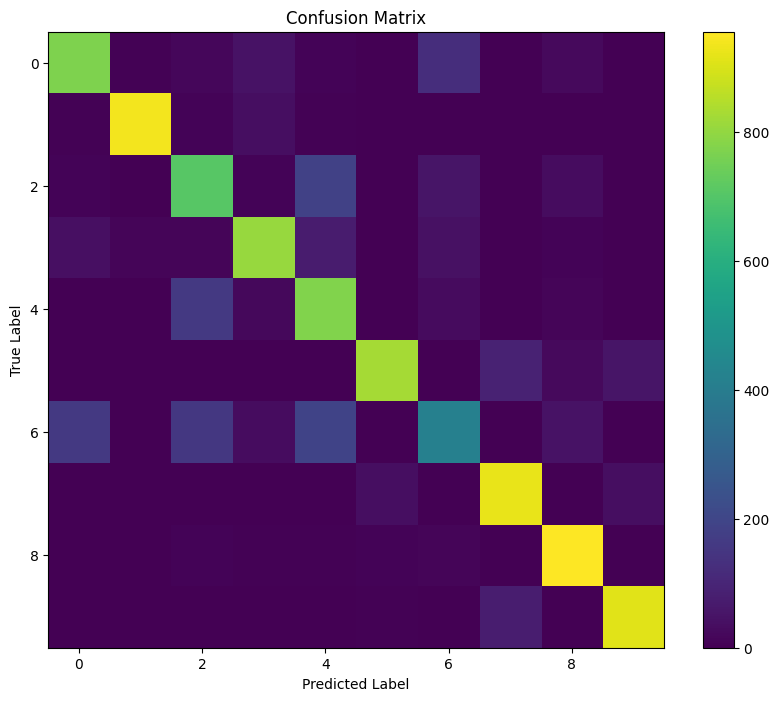

In [13]:
# Define hyperparameters to search
epochs_values = [10]
hidden_layers_values = [3, 5]
hidden_size_values = [32, 64, 128]
learning_rate_values = [1e-3, 1e-4]
optimizer_values = ['sgd', 'momentum', 'nesterov']
batch_size_values = [16, 32, 64]

best_models = []
best_accuracies = []

# Perform hyperparameter search
for epochs in epochs_values:
    for hidden_layers in hidden_layers_values:
        for hidden_size in hidden_size_values:
            for learning_rate in learning_rate_values:
                for optimizer_name in optimizer_values:
                    for batch_size in batch_size_values:
                        # Initialize and train the model
                        nn = NeuralNetwork(input_size=784, hidden_layers=hidden_layers,
                                           hidden_size=hidden_size, output_size=10) # for mnist: input_size=28*28=784 and output_size=10
                        optimizer = Optimizer(method=optimizer_name)  # define which optimization we want
                        for i in range(0, len(X_train), batch_size):
                            X_batch = X_train[i:i+batch_size]
                            y_batch = y_train[i:i+batch_size]
                            nn.train(X_batch, y_batch, epochs=epochs, learning_rate=learning_rate, optimizer=optimizer, verbose=False) # since we have kep verbose=false no loss is being printed

                        # Evaluate on validation set
                        y_pred = nn.predict(X_val)
                        accuracy = accuracy_score(y_val, y_pred)

                        # Save the model if it achieves top accuracy
                        if len(best_accuracies) < 5 or accuracy > min(best_accuracies): #check if either the list of best accuracies has fewer than 5 elements or if the accuracy of the current model  is greater than the minimum accuracy in the list.
                        #if the above condition is true, the current model along with its parameters and its accuracy is added to the list of best models and best_accuracies
                            best_models.append((nn, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size))
                            best_accuracies.append(accuracy)
                            if len(best_accuracies) > 5:
                                min_index = np.argmin(best_accuracies)
                                del best_models[min_index]
                                del best_accuracies[min_index]

# Report top 5 configurations
for i, (model, epochs, hidden_layers, hidden_size, learning_rate, optimizer_name, batch_size) in enumerate(best_models):
    print(f"Top {i+1} Configuration:")
    print(f"Epochs: {epochs}, Hidden Layers: {hidden_layers}, Hidden Size: {hidden_size}, "
          f"Learning Rate: {learning_rate}, Optimizer: {optimizer_name}, Batch Size: {batch_size}")
    print(f"Validation Accuracy: {best_accuracies[i]:.4f}")
    print()

# Evaluate the best model on the test set
best_model = best_models[0][0]
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap='viridis')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

####As discuused before now lets write code for all hyperparameters together

#### Note I tried to run the below code for more than 3 hours but it was taking a lot of time to compute, so I had to interrupt the execution

#### Overall, the code was running perfectly.

In [14]:


class NeuralNetwork_h:
    def __init__(self, input_size, hidden_layers, hidden_size, output_size, weight_init='random', activation_func='sigmoid', weight_decay=0):
        self.input_size = input_size
        self.hidden_layers = hidden_layers
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights = []
        self.biases = []
        self.activations = []
        self.activation_func = activation_func

        # Initialize weights and biases for hidden layers
        prev_size = input_size
        for _ in range(hidden_layers):
            if weight_init == 'random':
                self.weights.append(np.random.randn(prev_size, hidden_size))
            elif weight_init == 'xavier':
                self.weights.append(np.random.randn(prev_size, hidden_size) * np.sqrt(2 / (prev_size + hidden_size)))
            else:
                raise ValueError("Invalid weight initialization method.")
            self.biases.append(np.zeros(hidden_size))
            self.activations.append(np.zeros(hidden_size))
            prev_size = hidden_size

        # Initialize weights and biases for output layer
        if weight_init == 'random':
            self.weights.append(np.random.randn(hidden_size, output_size))
        elif weight_init == 'xavier':
            self.weights.append(np.random.randn(hidden_size, output_size) * np.sqrt(2 / (hidden_size + output_size)))
        else:
            raise ValueError("Invalid weight initialization method.")
        self.biases.append(np.zeros(output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def forward(self, X):
        output = X
        for i in range(self.hidden_layers):
            if self.activation_func == 'sigmoid':
                output = self.sigmoid(np.dot(output, self.weights[i]) + self.biases[i])
            elif self.activation_func == 'relu':
                output = self.relu(np.dot(output, self.weights[i]) + self.biases[i])
            elif self.activation_func == 'tanh':
                output = self.tanh(np.dot(output, self.weights[i]) + self.biases[i])
            else:
                raise ValueError("Invalid activation function.")
            self.activations[i] = output
        output = self.softmax(np.dot(output, self.weights[-1]) + self.biases[-1])
        return output

    def backward(self, X, y, weight_decay):
        batch_size = X.shape[0]
        gradients_w = [np.zeros_like(w) for w in self.weights]
        gradients_b = [np.zeros_like(b) for b in self.biases]

        # Forward pass
        output = self.forward(X)

        # Backward pass
        error = output - np.eye(self.output_size)[y]
        gradients_w[-1] = np.dot(self.activations[-1].T, error) + weight_decay * self.weights[-1]
        gradients_b[-1] = np.sum(error, axis=0)

        for i in range(self.hidden_layers-1, -1, -1):
            if self.activation_func == 'sigmoid':
                activation_derivative = self.activations[i] * (1 - self.activations[i])
            elif self.activation_func == 'relu':
                activation_derivative = np.where(self.activations[i] > 0, 1, 0)
            elif self.activation_func == 'tanh':
                activation_derivative = 1 - self.activations[i] ** 2
            else:
                raise ValueError("Invalid activation function.")
            error = np.dot(error, self.weights[i+1].T) * activation_derivative
            gradients_w[i] = np.dot(self.activations[i-1].T, error) + weight_decay * self.weights[i] * self.weights[i] if i > 0 else np.dot(X.T, error) + weight_decay * self.weights[i]
            gradients_b[i] = np.sum(error, axis=0)

        return gradients_w, gradients_b

    def train(self, X, y, epochs, learning_rate, optimizer=None, verbose=True, weight_decay=0):
        for epoch in range(epochs):
            gradients_w, gradients_b = self.backward(X, y, weight_decay) # computing gradients through backward propogation
            if optimizer is not None:
                optimizer.update_params(self, gradients_w, gradients_b, learning_rate)
            else:
                for i in range(len(self.weights)):
                    self.weights[i] -= learning_rate * gradients_w[i] / len(X)
                    self.biases[i] -= learning_rate * gradients_b[i] / len(X)
            if verbose:
              #cross entropy loss
                loss = -np.mean(np.log(self.forward(X)[np.arange(len(y)), y]))
                print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

In [17]:
# Define hyperparameters to search
hyperparameters = {
    'epochs': [1, 2],
    'hidden_layers': [3, 5],
    'hidden_size': [32, 64, 128],
    'weight_decay': [0, 0.0005, 0.5],
    'weight_initialization': ['random', 'xavier'],
    'activation_function': ['sigmoid', 'tanh', 'relu'],
    'learning_rate': [1e-3, 1e-4],
    'optimizer': ['sgd', 'momentum', 'nesterov'],
    'batch_size': [16, 32, 64]
}

best_models = []
best_accuracies = []

# Perform hyperparameter search
for epochs in hyperparameters['epochs']:
    for hidden_layers in hyperparameters['hidden_layers']:
        for hidden_size in hyperparameters['hidden_size']:
            for weight_decay in hyperparameters['weight_decay']:
                for weight_init in hyperparameters['weight_initialization']:
                    for activation_func in hyperparameters['activation_function']:
                        for learning_rate in hyperparameters['learning_rate']:
                            for optimizer_name in hyperparameters['optimizer']:
                                for batch_size in hyperparameters['batch_size']:
                                    # Initialize and train the model
                                    nn = NeuralNetwork_h(input_size=784, hidden_layers=hidden_layers,
                                                       hidden_size=hidden_size, output_size=10,
                                                       weight_init=weight_init, activation_func=activation_func,
                                                       weight_decay=weight_decay)
                                    optimizer = Optimizer(method=optimizer_name)
                                    for i in range(0, len(X_train), batch_size):
                                        X_batch = X_train[i:i+batch_size]
                                        y_batch = y_train[i:i+batch_size]
                                        nn.train(X_batch, y_batch, epochs=epochs, learning_rate=learning_rate,
                                                 optimizer=optimizer, verbose=False)

                                    # Evaluate on validation set
                                    y_pred_val = nn.predict(X_val)
                                    accuracy = accuracy_score(y_val, y_pred_val)

                                    # to store top 5 configurations
                                    if len(best_accuracies) < 5 or accuracy > min(best_accuracies):
                                        best_models.append((nn, epochs, hidden_layers, hidden_size,
                                                            weight_decay, weight_init, activation_func,
                                                            learning_rate, optimizer, batch_size))
                                        best_accuracies.append(accuracy)
                                        if len(best_accuracies) > 5:
                                            min_index = np.argmin(best_accuracies)
                                            del best_models[min_index]
                                            del best_accuracies[min_index]

# Report top 5 configurations
for i, (model, epochs, hidden_layers, hidden_size, weight_decay, weight_init, activation_func,
        learning_rate, optimizer, batch_size) in enumerate(best_models):
    print(f"Top {i+1} Configuration:")
    print(f"Epochs: {epochs}, Hidden Layers: {hidden_layers}, Hidden Size: {hidden_size}, "
          f"Weight Decay: {weight_decay}, Weight Initialization: {weight_init}, "
          f"Activation Function: {activation_func}, Learning Rate: {learning_rate}, "
          f"Optimizer: {optimizer.method}, Batch Size: {batch_size}")
    print(f"Validation Accuracy: {best_accuracies[i]:.4f}")
    print()

# Evaluate the best model on the test set
best_model = best_models[0][0]
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test Accuracy of the Best Model: {test_accuracy:.4f}")


<ipython-input-14-4f6337cc34c8>:44: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-14-4f6337cc34c8>:84: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * activation_derivative
<ipython-input-14-4f6337cc34c8>:84: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * activation_derivative
<ipython-input-14-4f6337cc34c8>:84: RuntimeWarning: invalid value encountered in multiply
  error = np.dot(error, self.weights[i+1].T) * activation_derivative
<ipython-input-14-4f6337cc34c8>:44: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-14-4f6337cc34c8>:44: RuntimeWarning: invalid value encountered in subtract
  exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
<ipython-input-14-4f6337cc34c8>:44: RuntimeWarning: invalid value encount

KeyboardInterrupt: 